In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style("whitegrid")

In [2]:
df = pd.read_csv('employee_attrition.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 3000 non-null   int64 
 1   gender              3000 non-null   object
 2   education           3000 non-null   object
 3   department          3000 non-null   object
 4   job_role            3000 non-null   object
 5   monthly_income      3000 non-null   int64 
 6   years_at_company    3000 non-null   int64 
 7   promotions          3000 non-null   int64 
 8   overtime            3000 non-null   object
 9   performance_rating  3000 non-null   int64 
 10  attrition           3000 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 257.9+ KB


# NO NULL VALUES IN THE DATASET

In [4]:
# checking for Duplicate rows
df.duplicated().sum()

np.int64(0)

# 0 Duplicate Rows as Well )

In [5]:
df.head()

,age,gender,education,department,job_role,monthly_income,years_at_company,promotions,overtime,performance_rating,attrition
0,35,Male,Post-Graduate,IT,Lead,65994,9,1,No,2,0
1,40,Male,Post-Graduate,IT,Lead,64492,8,1,No,2,1
2,45,Male,Post-Graduate,IT,Manager,75776,8,1,Yes,2,1
3,33,Male,Post-Graduate,Finance,Lead,67685,8,1,No,2,0
4,31,Male,Post-Graduate,HR,Manager,45721,10,1,Yes,2,0


Let's Perform EDA on the DATASET.

Text(0, 0.5, 'Count')

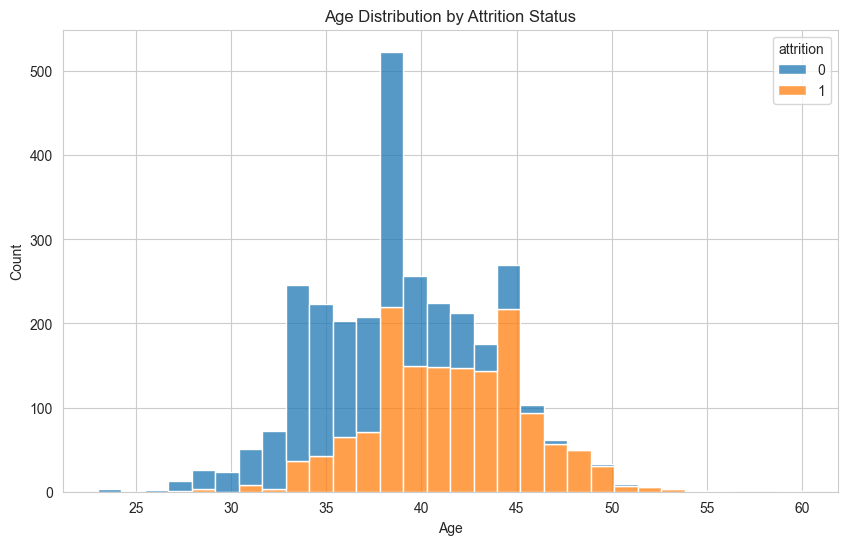

In [6]:
# Find the connection between Age and Attrition
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', hue='attrition', multiple='stack', bins=30)
plt.title('Age Distribution by Attrition Status')
plt.xlabel('Age')
plt.ylabel('Count')

C:\Users\Nani\AppData\Local\Temp\ipykernel_16996\3299093761.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='attrition', data=df, palette='coolwarm')


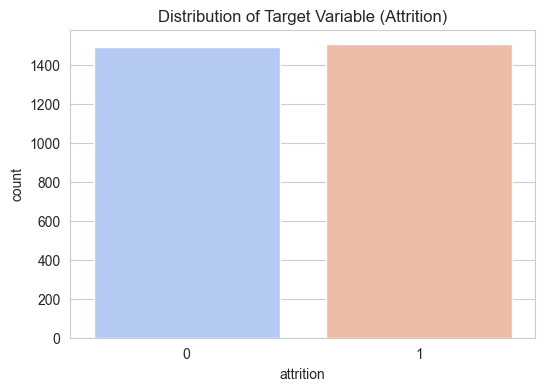

attrition
1    0.502
0    0.498
Name: proportion, dtype: float64


In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='attrition', data=df, palette='coolwarm')
plt.title('Distribution of Target Variable (Attrition)')
plt.show()

# Print exact numbers
print(df['attrition'].value_counts(normalize=True))

# WE have balance Data. 
## Out of total 3000 Employes

## 50.2% - Left 
## 49.8% - Stayed 

Lets check How the Categoery Columns Affect the Attrition

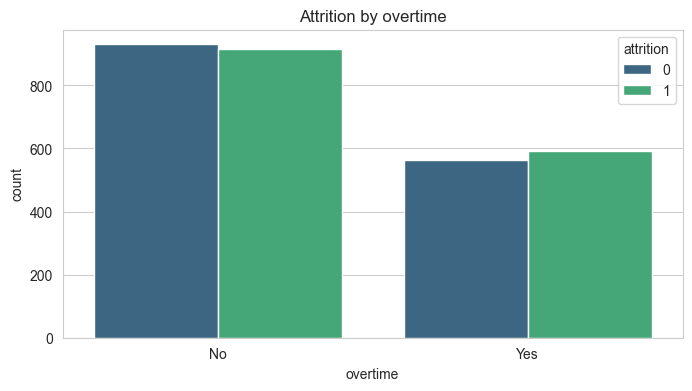

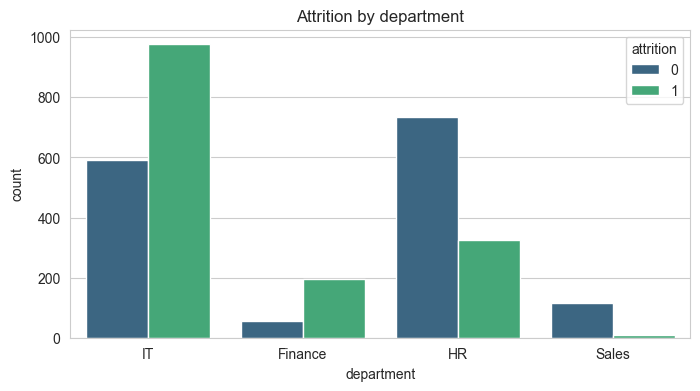

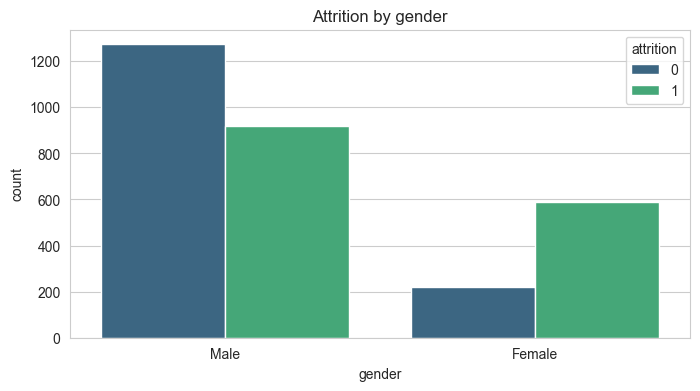

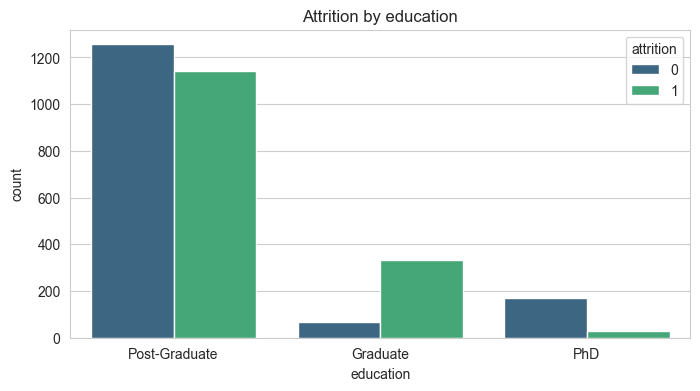

In [8]:
cols = ['overtime', 'department', 'gender', 'education']

for col in cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='attrition', data=df, palette='viridis')
    plt.title(f'Attrition by {col}')
    plt.show()

Unable to Find out much but IT Team and women leaves the most where as SALES team had the least Attrition's

Lets Compare the Income and the Attrition

C:\Users\Nani\AppData\Local\Temp\ipykernel_16996\2308784846.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='attrition', y='monthly_income', data=df, palette='Set2')


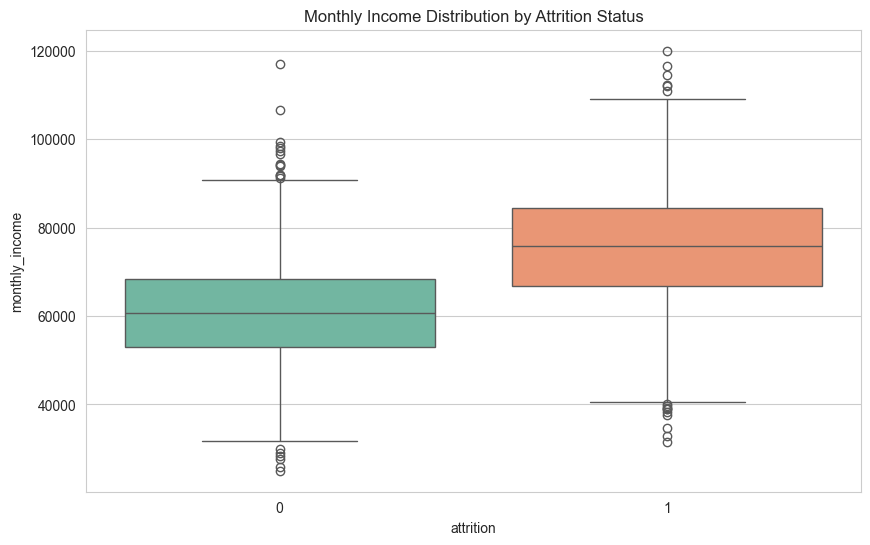

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='attrition', y='monthly_income', data=df, palette='Set2')
plt.title('Monthly Income Distribution by Attrition Status')
plt.show()

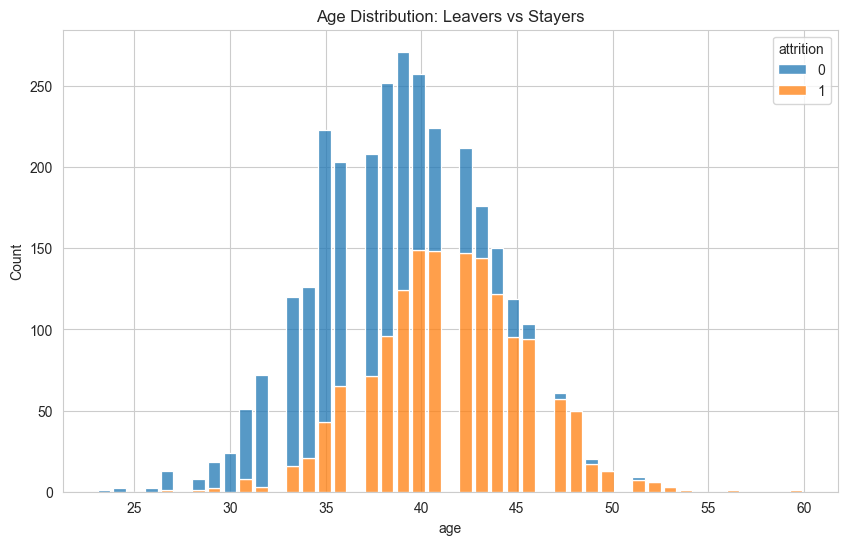

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(x='age', data=df, hue='attrition', multiple="stack", shrink=0.8)
plt.title('Age Distribution: Leavers vs Stayers')
plt.show()

Can't Find much people around 40 Years of AGE are likely to leave as well as they are the most no of employes in the company so possibilty.

IT + Female + age(40) will defineatly leave 

if Age == 50 : 
    also bye

# Designing the HeatMap it should give correlation between features

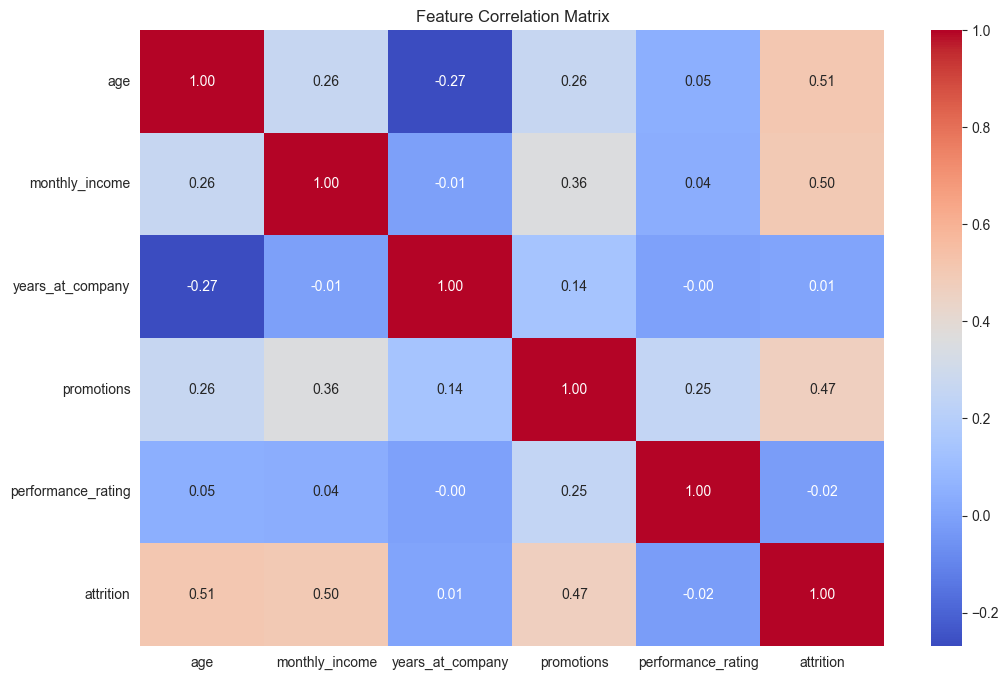

In [11]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

LETS start Training the model.

so I was thinking about using 2 Models Intially and Two Ways of Training them 

1 : Logistic Regression 

    a : Train Normally with Balanced Weights (class '1' will have more Weightage)
    b : apply SMOTE on the DATASET as we have dataset which has only '69' - 1's in the Attrition Column

2 : RandomForest 
why randomforest ?? 
I is an Ensembeling model, which is sure to Produce good Results compared a Single Model

    a : Train Normally with Provided Dataset
    b : Apply SMOTE and add synthetic data then train and TEST

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('attrition', axis=1)
y = df['attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [13]:
# Just checking the value counts in y_train and y_test
print("Training set class distribution:")
print(y_train.value_counts())
print("\nTest set class distribution:")
print(y_test.value_counts())

Training set class distribution:
attrition
1    1055
0    1045
Name: count, dtype: int64

Test set class distribution:
attrition
1    451
0    449
Name: count, dtype: int64


In [14]:
# Creating the column Transformer and Pipeline for preprocessing and modeling
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from imblearn.over_sampling import SMOTE

In [15]:
X.head()

,age,gender,education,department,job_role,monthly_income,years_at_company,promotions,overtime,performance_rating
0,35,Male,Post-Graduate,IT,Lead,65994,9,1,No,2
1,40,Male,Post-Graduate,IT,Lead,64492,8,1,No,2
2,45,Male,Post-Graduate,IT,Manager,75776,8,1,Yes,2
3,33,Male,Post-Graduate,Finance,Lead,67685,8,1,No,2
4,31,Male,Post-Graduate,HR,Manager,45721,10,1,Yes,2


In [16]:
df['job_role'].unique()

array(['Lead', 'Manager', 'Executive'], dtype=object)

In [17]:
#ORDINAL ENCODING ORDER

education_order = ['Post-Graduate', 'Graduate', 'PhD']

job_order = ['Executive', 'Manager', 'Lead']



### The departent Column has no connection between the Values inside the Column itself so we are going with OneHotEncoder 

### I am Normalizing every other Numerical column using Standard scalar which will get all their mean to 0 and SD to 1 

### The values will now be Colser to 0 and range between 2 to -2 at most probobaly if greater than that might be an Outliner

EDUCATION and JOB_ROLE they have a ORDER like the values inside that Column are Greater than Each Other 

Education : 'Post-Graduate' < 'Graduate' < 'PhD'

Job_role  : 'Executive' < 'Manager' < 'Lead'

In [18]:
Transformer = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(drop='first'), ['department', 'gender', 'overtime']),
    ('ordinal', OrdinalEncoder(categories=[education_order, job_order]), ['education', 'job_role']),
    ('scaler', StandardScaler(), ['age', 'monthly_income', 'years_at_company'])
])

In [19]:
# Create SMOTE dataset
smote = SMOTE(random_state=42)

## SMOTE ONLY ACCEPTS NUMERICAL DATA, so lets transform X_train first
X_train_transformed = Transformer.fit_transform(X_train)


X_train_res, y_train_res = smote.fit_resample(X_train_transformed, y_train)

## NOW LETS Create PIPELINES for LogisticRegression First

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [21]:
logi_pipe = Pipeline(steps=[
    ('preprocessor', Transformer),
    ('classifier', LogisticRegression(class_weight='balanced', random_state=42))
])

In [22]:
logi_model = logi_pipe.fit(X_train, y_train)
y_pred = logi_model.predict(X_test)


In [23]:
logi_smote_model = LogisticRegression(class_weight='balanced', random_state=42)
logi_smote_model.fit(X_train_res, y_train_res)
y_smote_pred = logi_smote_model.predict(Transformer.transform(X_test))

Predicting Accuracy , Precision , Recall and Confusion Matrix as well

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [25]:
# Accuracy and classification report for both models
print("Logistic Regression without SMOTE:")
print("accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("roc_auc_score:", roc_auc_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Logistic Regression without SMOTE:
accuracy: 0.8477777777777777
Precision: 0.8600917431192661
Recall: 0.8314855875831486
F1 Score: 0.8455467869222097
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       449
           1       0.86      0.83      0.85       451

    accuracy                           0.85       900
   macro avg       0.85      0.85      0.85       900
weighted avg       0.85      0.85      0.85       900

roc_auc_score: 0.8478140632793248
Confusion Matrix:
[[388  61]
 [ 76 375]]


In [26]:
print("Logistic Regression with SMOTE:")
print("accuracy:", accuracy_score(y_test, y_smote_pred))
print("Precision:", precision_score(y_test, y_smote_pred))
print("Recall:", recall_score(y_test, y_smote_pred))
print("F1 Score:", f1_score(y_test, y_smote_pred))
print(classification_report(y_test, y_smote_pred))
print("roc_auc_score:", roc_auc_score(y_test, y_smote_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_smote_pred))

Logistic Regression with SMOTE:
accuracy: 0.8477777777777777
Precision: 0.8600917431192661
Recall: 0.8314855875831486
F1 Score: 0.8455467869222097
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       449
           1       0.86      0.83      0.85       451

    accuracy                           0.85       900
   macro avg       0.85      0.85      0.85       900
weighted avg       0.85      0.85      0.85       900

roc_auc_score: 0.8478140632793248
Confusion Matrix:
[[388  61]
 [ 76 375]]


### As we can see the scores are not that Good lets go and try Ensemble Methods

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rand_pipe = Pipeline(steps=[
    ('preprocessor', Transformer),
    ('classifier', RandomForestClassifier(n_estimators=100,class_weight='balanced', random_state=42))
])

In [29]:
rand_model = rand_pipe.fit(X_train, y_train)
y_rand_pred = rand_model.predict(X_test)

In [30]:
rand_smote_model = RandomForestClassifier(n_estimators=100, random_state=42)
rand_smote_model.fit(X_train_res, y_train_res)
y_rand_smote_pred = rand_smote_model.predict(Transformer.transform(X_test))

In [31]:
print("RandomForest without SMOTE:")
print("accuracy:", accuracy_score(y_test, y_rand_pred))
print("Precision:", precision_score(y_test, y_rand_pred))
print("Recall:", recall_score(y_test, y_rand_pred))
print("F1 Score:", f1_score(y_test, y_rand_pred))
print("roc_auc_score:", roc_auc_score(y_test, y_rand_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_rand_pred))

RandomForest without SMOTE:
accuracy: 0.8988888888888888
Precision: 0.8982300884955752
Recall: 0.9002217294900222
F1 Score: 0.8992248062015504
roc_auc_score: 0.8988859204242985
Confusion Matrix:
[[403  46]
 [ 45 406]]


In [32]:
print("RandomForest with SMOTE:")
print("accuracy:", accuracy_score(y_test, y_rand_smote_pred))
print("Precision:", precision_score(y_test, y_rand_smote_pred))
print("Recall:", recall_score(y_test, y_rand_smote_pred))
print("F1 Score:", f1_score(y_test, y_rand_smote_pred))
print("roc_auc_score:", roc_auc_score(y_test, y_rand_smote_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_rand_smote_pred))

RandomForest with SMOTE:
accuracy: 0.9011111111111111
Precision: 0.8986784140969163
Recall: 0.9046563192904656
F1 Score: 0.901657458563536
roc_auc_score: 0.9011032153245202
Confusion Matrix:
[[403  46]
 [ 43 408]]


#### It's Not a Suprise Ensemble methods are supossed to work better than Normal on Good Amount of DATA

#### as we can see the Model " RANDOM FOREST WITH SMOTE " worked better than all other models so Lets import that model and create a Wrapper and API endpoint to it.

In [33]:
coefficients = logi_smote_model.coef_[0]

coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})

coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()

top_drivers = coef_df.sort_values(by='Abs_Coefficient', ascending=False).head(10)

print(top_drivers[['Feature', 'Coefficient']])

              Feature  Coefficient
2           education    -3.168080
7          promotions     1.565044
0                 age    -1.174338
3          department    -1.129346
8            overtime     1.031365
5      monthly_income     0.480797
9  performance_rating     0.369759
4            job_role     0.324588
6    years_at_company     0.092796
1              gender     0.052232


C:\Users\Nani\AppData\Local\Temp\ipykernel_16996\4060917459.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


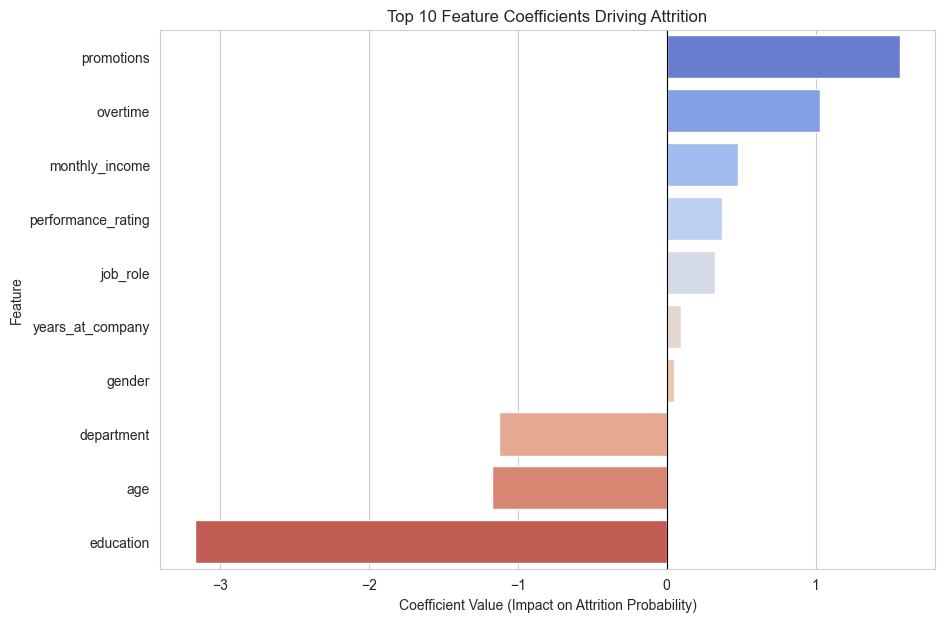

In [34]:
plt.figure(figsize=(10, 7))
# Use the actual coefficient value for the bar plot to show POSITIVE/NEGATIVE impact
sns.barplot(
    x='Coefficient', 
    y='Feature', 
    data=top_drivers.sort_values(by='Coefficient', ascending=False), # Sort by value for better visual flow
    palette="coolwarm"
)
plt.title('Top 10 Feature Coefficients Driving Attrition')
plt.axvline(0, color='black', linewidth=0.8) # Draw a line at zero for separation
plt.xlabel('Coefficient Value (Impact on Attrition Probability)')
plt.ylabel('Feature')
plt.show()

In [35]:
# LETS SAVE THE MODEL using pickle

import pickle
with open('logistic_smote_model.pkl', 'wb') as f:
    pickle.dump(logi_smote_model, f)

In [36]:
# Dump the transformer as well

with open('transformer.pkl', 'wb') as f:
    pickle.dump(Transformer, f)